# Palmer Penguins Modeling

Import the Palmer Penguins dataset and print out the first few rows.

Suppose we want to predict `bill_depth_mm` using the other variables in the dataset.

Which variables would we need to **dummify**?

In [2]:
# !pip install palmerpenguins
from palmerpenguins import load_penguins
import pandas as pd
import numpy as np

In [3]:
df = load_penguins()

In [4]:
df = df.dropna()

In [5]:
df = df.copy()

Let's use `bill_length_mm` to predict `bill_depth_mm`. Prepare your data and fit the following models on the entire dataset:

* Simple linear regression (e.g. straight-line) model
* Quadratic (degree 2 polynomial) model
* Cubic (degree 3 polynomial) model
* Degree 10 polynomial model

Make predictions for each model and plot your fitted models on the scatterplot.

In [6]:
from sklearn.linear_model import LinearRegression

In [7]:
df["blm_sq"] = df["bill_length_mm"] ** 2

In [8]:
df["blm_cube"] = df['bill_length_mm'] ** 3

In [9]:
for i in range(4, 11):
  df[f"{i}"] = df['bill_length_mm'] ** i

In [10]:
lin = LinearRegression()
square = LinearRegression()
cube = LinearRegression()
ten = LinearRegression()

In [11]:
lin = lin.fit(X=df[['bill_length_mm']],
                y=df['bill_depth_mm'])

In [15]:
square = square.fit(X=df[['bill_length_mm', 'blm_sq']],
                   y=df['bill_depth_mm'])

In [16]:
cube = cube.fit(X=df[['bill_length_mm', 'blm_sq', 'blm_cube']],
                   y=df['bill_depth_mm'])

In [17]:
deg_10 = ten.fit(X=df[['bill_length_mm', 'blm_sq', 'blm_cube', '4', '5', '6', '7', '8', '9', '10']],
                   y=df['bill_depth_mm'])

In [20]:
scale = pd.DataFrame()
scale['bill_length_mm'] = np.linspace(min(df['bill_length_mm']), max(df['bill_length_mm']), 1000)
scale['blm_sq'] = scale['bill_length_mm'] ** 2
scale['blm_cube'] = scale['bill_length_mm'] ** 3
for i in range(4, 11):
  scale[f'{i}'] = scale['bill_length_mm'] ** i

In [76]:
y_lin_ = pd.Series(
    lin.predict(scale[['bill_length_mm']]),
    index=scale["bill_length_mm"]
)

In [77]:
y_sq_ = pd.Series(
    square.predict(scale[['bill_length_mm', 'blm_sq']]),
    index=scale['bill_length_mm']
)

In [78]:
y_cube_ = pd.Series(
    cube.predict(scale[['bill_length_mm', 'blm_sq', 'blm_cube']]),
    index=scale['bill_length_mm']
)

In [79]:
y_ten_ = pd.Series(
    ten.predict(scale[['bill_length_mm', 'blm_sq', 'blm_cube', '4', '5', '6', '7', '8', '9', '10']]),
    index=scale['bill_length_mm']
)

<Axes: xlabel='bill_length_mm', ylabel='bill_depth_mm'>

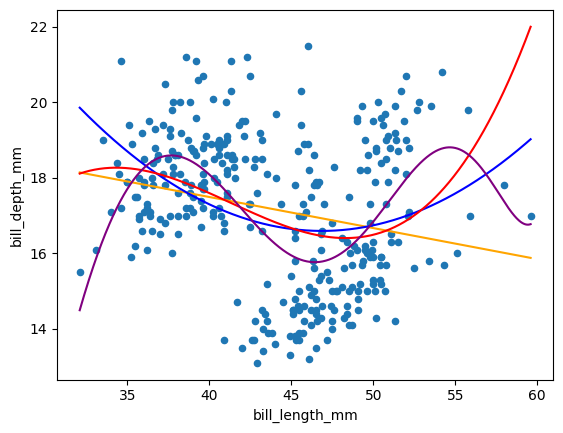

In [80]:
df.plot.scatter(x="bill_length_mm", y="bill_depth_mm")
y_lin_.plot.line(c = "orange")
y_sq_.plot.line(c = "blue")
y_cube_.plot.line(c = "red")
y_ten_.plot.line(c = "purple")

* Are any of the models above underfitting the data? If so, which ones and how can you tell?
* Are any of thhe models above overfitting the data? If so, which ones and how can you tell?
* Which of the above models do you think fits the data best and why?

In [21]:
lin.score(df[['bill_length_mm']], df['bill_depth_mm'])


0.0522696813966369

In [22]:
square.score(df[['bill_length_mm', 'blm_sq']], df['bill_depth_mm'])

0.10953762597109384

In [19]:
cube.score(df[['bill_length_mm', 'blm_sq', 'blm_cube']], df['bill_depth_mm'])

0.13703274818584865

In [20]:
ten.score(df[['bill_length_mm', 'blm_sq', 'blm_cube', '4', '5', '6', '7', '8', '9', '10']], df['bill_depth_mm'])

0.26973160008086916

Obviously, the R^2 value goes up as the degree of the polynomial increases (LinearRegression() doesn't have an adjusted R^2 method).  But visually, none of the polynomials fit the data that well.  It looks like there are two different groups of data in the scatter plot, but the combination of the groups reduces the strength of the relationship between bill length and bill depth.  Of course, the degree 10 polynomial looks the most overfitted, especially after a bill length of 55 mm, since there are not a lot of observations, but the polynomial equation shifts greatly to account for the outliers.

Despite the overfitting at the outliers, the degree 10 polynomial fits the data best, because it is able to move its prediction to account for the 2 different groups, although it overfits the data in areas where it must extrapolate, such as below 35 mm and above 55 mm.